In [1]:
!unzip creditcard.csv

Archive:  creditcard.csv.zip
  inflating: creditcard.csv          


In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, MaxPooling2D , Dropout , Flatten , BatchNormalization
from imblearn.over_sampling import SMOTE
import numpy as np
import tensorflow as tf
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model, load_model
from keras.models import Sequential
from keras.optimizers import SGD,Adam
from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from keras.utils import np_utils
from keras import metrics

In [8]:
data_frame = pd.read_csv("creditcard.csv")

In [9]:
data_frame = data_frame.drop(['Time'], axis=1)
Y = data_frame['Class']
X = data_frame.drop(['Class'], axis=1)

X['Amount'] = (X['Amount']-X['Amount'].mean())/ X['Amount'].std()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [10]:
smote = SMOTE(random_state=50, k_neighbors=4, sampling_strategy='minority')
X_resample, y_resample = smote.fit_resample(X_train, y_train)

noise_train = 0.4 * np.random.normal(loc=0.0, scale=1.0, size=X_resample.shape) 
noise_test = 0.4 * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 
x_train_noise = X_resample + noise_train
x_test_noise = X_test + noise_test

Y_train = np_utils.to_categorical(y_resample)
Y_test = np_utils.to_categorical(y_test)

**autoencoder**

In [11]:
encoder = Sequential()
encoder.add(Dense(22, activation="tanh", input_shape=(X_resample.shape[1],)))
encoder.add(Dense(15, activation="relu"))
encoder.add(Dense(10, activation="relu"))
encoder.add(Dense(15, activation='relu'))
encoder.add(Dense(22, activation='tanh'))
encoder.add(Dense(29))
encoder.compile(optimizer='adam', loss='mean_squared_error')
encoder.fit(x_train_noise,X_resample ,epochs=10,batch_size=512,shuffle=True,validation_data=(x_test_noise, X_test))

Epoch 1/10
889/889 [==============================] - 4s 3ms/step - loss: 4.6860 - val_loss: 0.8293
Epoch 2/10
889/889 [==============================] - 3s 3ms/step - loss: 1.9436 - val_loss: 0.7375
Epoch 3/10
889/889 [==============================] - 3s 3ms/step - loss: 1.2347 - val_loss: 0.6807
Epoch 4/10
889/889 [==============================] - 3s 3ms/step - loss: 0.8615 - val_loss: 0.6250
Epoch 5/10
889/889 [==============================] - 3s 3ms/step - loss: 0.6837 - val_loss: 0.5890
Epoch 6/10
889/889 [==============================] - 3s 3ms/step - loss: 0.5955 - val_loss: 0.5623
Epoch 7/10
889/889 [==============================] - 3s 3ms/step - loss: 0.5452 - val_loss: 0.5408
Epoch 8/10
889/889 [==============================] - 3s 3ms/step - loss: 0.5106 - val_loss: 0.5234
Epoch 9/10
889/889 [==============================] - 3s 3ms/step - loss: 0.4848 - val_loss: 0.5075
Epoch 10/10
889/889 [==============================] - 3s 3ms/step - loss: 0.4637 - val_loss: 0.4960

In [12]:
x_train_encoder = encoder.predict(x_train_noise)
x_valid_encoder = encoder.predict(X_test)

1781/1781 [==============================] - 3s 1ms/step


**fully connected**

In [9]:
model = Sequential()
model.add(Dense(22, activation="relu",input_shape=(29,)))
model.add(Dense(15, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',[metrics.Recall(thresholds=x,class_id=1) for x in np.arange(0,1,0.01)],[metrics.Precision(thresholds=z) for z in np.arange(0,1,0.01)]])
history = model.fit(x_train_encoder,Y_train,epochs=2,batch_size=256,shuffle=True,validation_data=(x_valid_encoder,Y_test))

Epoch 1/2
1777/1777 [==============================] - 215s 102ms/step - loss: 0.1237 - accuracy: 0.9525 - recall: 1.0000 - recall_1: 0.9994 - recall_2: 0.9979 - recall_3: 0.9960 - recall_4: 0.9940 - recall_5: 0.9922 - recall_6: 0.9906 - recall_7: 0.9893 - recall_8: 0.9880 - recall_9: 0.9868 - recall_10: 0.9858 - recall_11: 0.9847 - recall_12: 0.9835 - recall_13: 0.9824 - recall_14: 0.9814 - recall_15: 0.9804 - recall_16: 0.9793 - recall_17: 0.9782 - recall_18: 0.9772 - recall_19: 0.9762 - recall_20: 0.9752 - recall_21: 0.9742 - recall_22: 0.9733 - recall_23: 0.9723 - recall_24: 0.9713 - recall_25: 0.9702 - recall_26: 0.9693 - recall_27: 0.9683 - recall_28: 0.9672 - recall_29: 0.9662 - recall_30: 0.9653 - recall_31: 0.9642 - recall_32: 0.9632 - recall_33: 0.9622 - recall_34: 0.9612 - recall_35: 0.9603 - recall_36: 0.9592 - recall_37: 0.9579 - recall_38: 0.9569 - recall_39: 0.9558 - recall_40: 0.9546 - recall_41: 0.9534 - recall_42: 0.9523 - recall_43: 0.9511 - recall_44: 0.9499 - recal

In [ ]:
keys =list( history.history.keys())
keys

In [11]:
recall = []
precision = []
for i in range(100):
  recall.append(history.history[keys[i+2]][-1])
  precision.append(history.history[keys[i+102]][-1])


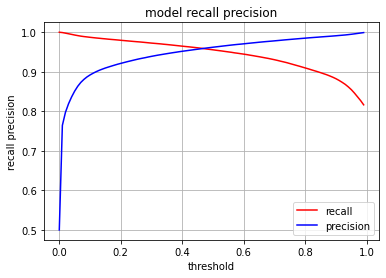

In [12]:
fig = plt.figure()
plt.plot(np.arange(0,1,0.01), recall,'r')
plt.plot(np.arange(0,1,0.01), precision,'b')
plt.title('model recall precision')
plt.ylabel('recall precision')
plt.xlabel('threshold')
plt.legend(['recall', 'precision'])
plt.grid()

**test evaluation**

In [14]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(Y_test, axis=1)

1781/1781 [==============================] - 3s 1ms/step


Accuracy: 0.965205
Precision: 0.521037
Recall: 0.926547
F1 score: 0.531486


Text(0.5, 1.0, 'model loss')

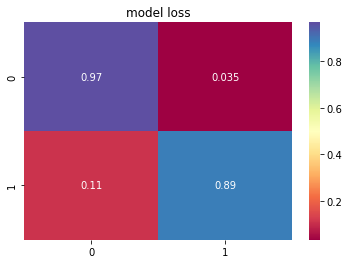

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
fig = plt.figure()
mat = confusion_matrix(y_test, y_pred , normalize="true")
sns.heatmap(mat, annot=True, cmap='Spectral')
plt.title('model loss')

**without autoencoder and resampling**

In [3]:
data_frame = pd.read_csv("creditcard.csv")

In [4]:
data_frame = data_frame.drop(['Time'], axis=1)
Y = data_frame['Class']
X = data_frame.drop(['Class'], axis=1)

X['Amount'] = (X['Amount']-X['Amount'].mean())/ X['Amount'].std()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [5]:
model = Sequential()
model.add(Dense(22, activation="relu",input_shape=(29,)))
model.add(Dense(15, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy',[metrics.Recall(thresholds=x,class_id=1) for x in np.arange(0,1,0.01)],[metrics.Precision(thresholds=z) for z in np.arange(0,1,0.01)]])
history = model.fit(X_train,Y_train,epochs=1,batch_size=512,shuffle=True,validation_data=(X_test,Y_test))

446/446 [==============================] - 111s 150ms/step - loss: 0.2468 - accuracy: 0.9983 - recall: 1.0000 - recall_1: 0.7335 - recall_2: 0.6853 - recall_3: 0.6421 - recall_4: 0.5888 - recall_5: 0.5431 - recall_6: 0.5025 - recall_7: 0.4797 - recall_8: 0.4442 - recall_9: 0.4086 - recall_10: 0.3883 - recall_11: 0.3553 - recall_12: 0.3401 - recall_13: 0.3071 - recall_14: 0.2843 - recall_15: 0.2614 - recall_16: 0.2487 - recall_17: 0.2437 - recall_18: 0.2360 - recall_19: 0.2234 - recall_20: 0.2183 - recall_21: 0.2005 - recall_22: 0.1827 - recall_23: 0.1599 - recall_24: 0.1421 - recall_25: 0.1371 - recall_26: 0.1218 - recall_27: 0.1142 - recall_28: 0.1041 - recall_29: 0.0863 - recall_30: 0.0787 - recall_31: 0.0711 - recall_32: 0.0584 - recall_33: 0.0508 - recall_34: 0.0508 - recall_35: 0.0431 - recall_36: 0.0355 - recall_37: 0.0305 - recall_38: 0.0203 - recall_39: 0.0178 - recall_40: 0.0127 - recall_41: 0.0102 - recall_42: 0.0025 - recall_43: 0.0000e+00 - recall_44: 0.0000e+00 - recall_45

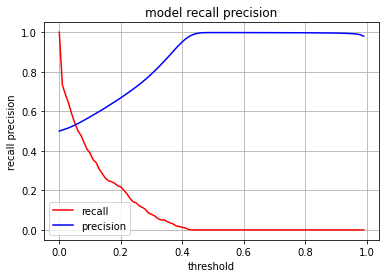

In [6]:
keys =list( history.history.keys())
recall = []
precision = []
for i in range(100):
  recall.append(history.history[keys[i+2]][-1])
  precision.append(history.history[keys[i+102]][-1])

fig = plt.figure()
plt.plot(np.arange(0,1,0.01), recall,'r')
plt.plot(np.arange(0,1,0.01), precision,'b')
plt.title('model recall precision')
plt.ylabel('recall precision')
plt.xlabel('threshold')
plt.legend(['recall', 'precision'])
plt.grid()

1781/1781 [==============================] - 3s 2ms/step
Accuracy: 0.998280
Precision: 0.499140
Recall: 0.500000
F1 score: 0.499570


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'model loss')

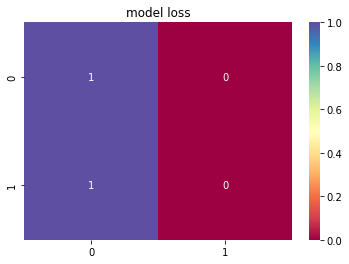

In [7]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)

fig = plt.figure()
mat = confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(mat, annot=True, cmap='Spectral')
plt.title('model loss')